# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [23]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,Biden,Trump,Wallace
ability,2,0,0
able,17,1,1
abolishing,0,0,1
abraham,0,0,1
absolutely,3,3,0


In [24]:
# Find the top 30 words said by each speaker
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Biden': [('people', 75),
  ('going', 60),
  ('fact', 38),
  ('hes', 35),
  ('way', 34),
  ('thats', 27),
  ('look', 25),
  ('deal', 24),
  ('im', 24),
  ('president', 22),
  ('said', 22),
  ('number', 21),
  ('vote', 21),
  ('did', 21),
  ('true', 20),
  ('just', 20),
  ('like', 19),
  ('sure', 19),
  ('make', 18),
  ('know', 17),
  ('able', 17),
  ('theyre', 16),
  ('dont', 16),
  ('plan', 16),
  ('say', 15),
  ('tax', 15),
  ('doesnt', 15),
  ('heres', 14),
  ('american', 14),
  ('want', 14)],
 'Trump': [('people', 67),
  ('dont', 43),
  ('going', 41),
  ('want', 40),
  ('know', 39),
  ('look', 38),
  ('said', 36),
  ('joe', 32),
  ('thats', 30),
  ('im', 29),
  ('got', 29),
  ('think', 27),
  ('just', 27),
  ('didnt', 24),
  ('country', 24),
  ('say', 23),
  ('good', 21),
  ('did', 21),
  ('theyre', 21),
  ('million', 20),
  ('tell', 20),
  ('left', 20),
  ('dollars', 19),
  ('youre', 19),
  ('way', 19),
  ('president', 19),
  ('like', 18),
  ('years', 18),
  ('election', 17),
  (

In [25]:
# Print the top 15 words said by each comedian
for speaker, top_words in top_dict.items():
    print(speaker)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Biden
people, going, fact, hes, way, thats, look, deal, im, president, said, number, vote, did
---
Trump
people, dont, going, want, know, look, said, joe, thats, im, got, think, just, didnt
---
Wallace
president, sir, going, question, vice, mr, trump, want, right, im, let, biden, gentlemen, people
---


**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [26]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['people',
 'going',
 'fact',
 'hes',
 'way',
 'thats',
 'look',
 'deal',
 'im',
 'president',
 'said',
 'number',
 'vote',
 'did',
 'true',
 'just',
 'like',
 'sure',
 'make',
 'know',
 'able',
 'theyre',
 'dont',
 'plan',
 'say',
 'tax',
 'doesnt',
 'heres',
 'american',
 'want',
 'people',
 'dont',
 'going',
 'want',
 'know',
 'look',
 'said',
 'joe',
 'thats',
 'im',
 'got',
 'think',
 'just',
 'didnt',
 'country',
 'say',
 'good',
 'did',
 'theyre',
 'million',
 'tell',
 'left',
 'dollars',
 'youre',
 'way',
 'president',
 'like',
 'years',
 'election',
 'weve',
 'president',
 'sir',
 'going',
 'question',
 'vice',
 'mr',
 'trump',
 'want',
 'right',
 'im',
 'let',
 'biden',
 'gentlemen',
 'people',
 'say',
 'minutes',
 'segment',
 'ask',
 'ahead',
 'years',
 'said',
 'election',
 'like',
 'talk',
 'economy',
 'okay',
 'minute',
 'fact',
 'youre',
 'court']

In [27]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('people', 3),
 ('going', 3),
 ('im', 3),
 ('president', 3),
 ('said', 3),
 ('like', 3),
 ('say', 3),
 ('want', 3),
 ('fact', 2),
 ('way', 2),
 ('thats', 2),
 ('look', 2),
 ('did', 2),
 ('just', 2),
 ('know', 2),
 ('theyre', 2),
 ('dont', 2),
 ('youre', 2),
 ('years', 2),
 ('election', 2),
 ('hes', 1),
 ('deal', 1),
 ('number', 1),
 ('vote', 1),
 ('true', 1),
 ('sure', 1),
 ('make', 1),
 ('able', 1),
 ('plan', 1),
 ('tax', 1),
 ('doesnt', 1),
 ('heres', 1),
 ('american', 1),
 ('joe', 1),
 ('got', 1),
 ('think', 1),
 ('didnt', 1),
 ('country', 1),
 ('good', 1),
 ('million', 1),
 ('tell', 1),
 ('left', 1),
 ('dollars', 1),
 ('weve', 1),
 ('sir', 1),
 ('question', 1),
 ('vice', 1),
 ('mr', 1),
 ('trump', 1),
 ('right', 1),
 ('let', 1),
 ('biden', 1),
 ('gentlemen', 1),
 ('minutes', 1),
 ('segment', 1),
 ('ask', 1),
 ('ahead', 1),
 ('talk', 1),
 ('economy', 1),
 ('okay', 1),
 ('minute', 1),
 ('court', 1)]

In [28]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[]

In [29]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [30]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

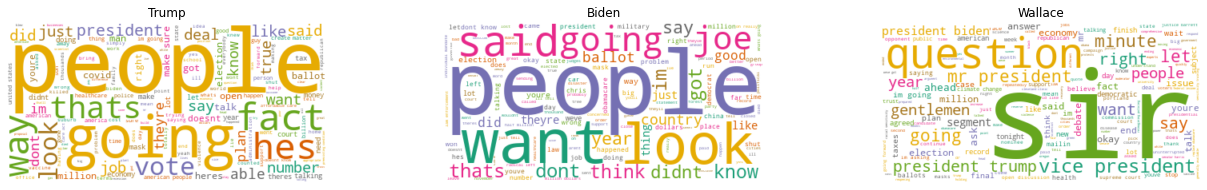

In [31]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30, 10]

full_names = ['Trump','Biden','Wallace']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Analysis

In [32]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
2,Wallace,759
1,Biden,914
0,Trump,1009
